In [1]:
import re
import jieba
#停用词列表
stopwords = [line.strip() for line in open('stopwords.txt','r',encoding='utf-8').readlines()]
with open('news.txt','r',encoding='utf-8') as fp,open('cut.txt','w',encoding='utf-8') as fpa: 
    for line in fp.readlines():
        line = line.strip().split('   ')
        words_iter = jieba.cut(line[1])
        word_content = ''
        #过滤标点，英文，数字
        for word in words_iter:
            word = re.sub('\W*|[a-z]*|[A-Z]*|\d*','',word)
            word = word.strip(' ')
            if word != '' and word not in stopwords:
                word_content += word + ' '
        fpa.write(line[0]+'   '+word_content.strip('  ')+'\n')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\tongjie\AppData\Local\Temp\jieba.cache
Loading model cost 1.737 seconds.
Prefix dict has been built successfully.


In [1]:
import jieba
from collections import Counter
title = []
text = []

with open('cut.txt','r',encoding='utf-8') as fp:
    for line in fp.readlines():
        line = line.split('   ')
        title.append(line[0])
        text.append(line[1])
    txt = ''.join(text)

classify = {}
for i,j in enumerate(set(title)):
    classify[j] = i

#存储每一类的文本，为之后提取关键词
lab_text = []
for i in enumerate(classify):
    lab_text.append([])

#每一条的类标签    
label = []
for i in title:
    label.append(int(classify[i]))


word_list = []
for k in classify:
    for i,j in zip(title,text):
        if i == k:
            lab_text[classify[i]].append(j)
            
    lab_txt = ''.join(lab_text[classify[k]])
    
    seg_list = jieba.cut(lab_txt)
    c = Counter()
    for x in seg_list:
        if len(x)>1 and x!='\r\n':
            c[x] += 1
    dic = {}
    for (n,v) in c.most_common(200):
        dic[n] = v
    word_list.append(dic)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\tongjie\AppData\Local\Temp\jieba.cache
Loading model cost 1.602 seconds.
Prefix dict has been built successfully.


In [2]:
print(word_list[1])

{'责任编辑': 1898, '记者': 1498, '公司': 1409, '发现': 1186, '孩子': 1048, '工作': 1025, '民警': 996, '警方': 980, '情况': 941, '相关': 918, '发生': 899, '视频': 869, '医院': 860, '现场': 811, '学生': 810, '男子': 803, '学校': 751, '人员': 745, '调查': 733, '时间': 717, '北京': 662, '中国': 660, '发布': 624, '来源': 609, '网友': 609, '万元': 598, '法院': 595, '嫌疑人': 590, '显示': 586, '一名': 572, '信息': 564, '平台': 564, '告诉': 547, '提供': 522, '影响': 520, '工作人员': 520, '新闻': 504, '家长': 501, '介绍': 487, '案件': 481, '服务': 481, '消息': 469, '手机': 467, '儿子': 458, '医生': 453, '企业': 453, '期间': 446, '犯罪': 445, '近日': 441, '死亡': 439, '组织': 436, '武晓东': 434, '消费者': 431, '公安局': 430, '过程': 430, '报道': 428, '新闻记者': 418, '部门': 414, '老师': 413, '疫情': 412, '车辆': 405, '上海': 405, '教育': 401, '网络': 401, '中心': 399, '市场': 397, '方式': 395, '患者': 393, '社会': 390, '生活': 385, '最终': 383, '女士': 381, '导致': 379, '进一步': 372, '被告人': 364, '发展': 363, '报警': 363, '女儿': 359, '老人': 357, '小区': 355, '银行': 353, '红星': 351, '接受': 347, '事故': 346, '原因': 345, '派出所': 345, '国家': 343, '管理': 342, '事件': 340, '

In [3]:
print(classify)

{'体育': 0, '社会': 1, '娱乐': 2, '军事': 3, '科技': 4, '财经': 5}


In [4]:
matrix = []
for para in text:
    vector = []
    pa = set(para.split(' '))
    for dic in word_list:
        for word in dic:
            if word in pa:
                #vector.append(para.split(' ').count(word)) #转化为词向量
                vector.append(1)
            else:
                vector.append(0)
    matrix.append(vector)

In [5]:
import numpy as np
import pandas as pd
key_words = []
for dic in word_list:
    for word in dic:
        key_words.append(word)

vec = np.array(matrix) #放入矩阵
dataset = pd.DataFrame(vec,index=label,columns=key_words)
dataset

,号码,开出,本期,参考,红球,比赛,奖号,大小,上期,分析,...,调查,华晨,累计,地方,规划,历史,完善,参与,分析,协定
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
#np.array(dataset.loc[i[:]])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(vec,dataset.index,random_state=50,train_size=0.8)
clf = svm.SVC(kernel = 'rbf',decision_function_shape = 'ovr')
#clf = svm.LinearSVC()
clf.fit(X_train,y_train)

SVC()

In [7]:
predict = clf.predict(X_test)
predict

array([5, 0, 5, ..., 0, 3, 2], dtype=int64)

In [8]:
accuracy_score(predict, y_test)

0.9197379197379197

In [9]:
#文本测试
import jieba
import re
stopwords = [line.strip() for line in open('stopwords.txt','r',encoding='utf-8').readlines()]
def txt_test(path,data,stopwords):
    fp = open(path,'r',encoding='utf-8')
    line = ''.join(fp.readlines())
    line = re.sub('\W*|[a-z]*|[A-Z]*|\d*','',line)
    txt = ''
    for word in jieba.cut(line):
        if word not in stopwords:
            txt +=word
    li = [i for i in jieba.cut(txt)]

    word_vec = []

    for word in list(data):
        if word in li:
            #word_vec.append(li.count(word))
            word_vec.append(1)
        else:
            word_vec.append(0)
    return word_vec #返回词向量

In [17]:
print(classify)

{'体育': 0, '社会': 1, '娱乐': 2, '军事': 3, '科技': 4, '财经': 5}


In [11]:
file_list = ['economic.txt','entertain.txt','society.txt']
for file in file_list:
    word_vec = txt_test(file, dataset.columns, stopwords)
    a = np.array(word_vec).reshape(1,1200)
    print(file[:-4],clf.predict(a))

economic [5]
entertain [2]
society [1]


In [12]:
#省份
import re
fp = open('State.txt','r',encoding='utf-8')
state = [line for line in fp.readlines()]

province = []
for lab in range(len(lab_text)):
    txt = ''
    for item in lab_text[lab]:
        txt+=item
    province.append(re.findall(state[0],txt))

In [13]:
#count
area = []
count = []
for i in range(len(province)):
    area.append([])
    count.append([])
    for ar in set(province[i]):
        area[i].append(ar)
        count[i].append(province[i].count(ar))

In [14]:
for i,j in zip(area,count):
    print(i,j)

['四川', '浙江', '江苏', '湖北', '海南', '北京', '澳门', '西藏', '山西', '深圳', '宁夏', '天津', '香港', '福建', '贵州', '台湾', '甘肃', '陕西', '山东', '内蒙古', '重庆', '吉林', '黑龙江', '江西', '湖南', '上海', '青海', '安徽', '广东', '河北', '河南', '辽宁', '云南', '广西', '新疆'] [85, 154, 157, 60, 82, 575, 16, 6, 40, 53, 9, 228, 15, 95, 8, 9, 8, 29, 125, 15, 226, 18, 10, 24, 30, 485, 2, 12, 189, 103, 93, 83, 42, 55, 28]
['四川', '浙江', '江苏', '湖北', '海南', '北京', '澳门', '西藏', '山西', '深圳', '宁夏', '天津', '香港', '福建', '贵州', '台湾', '甘肃', '陕西', '山东', '内蒙古', '重庆', '吉林', '黑龙江', '江西', '湖南', '上海', '青海', '安徽', '河南', '河北', '广东', '辽宁', '广西', '云南', '新疆'] [356, 160, 208, 83, 87, 1066, 2, 20, 69, 142, 22, 88, 78, 73, 66, 48, 37, 88, 192, 69, 113, 42, 109, 121, 173, 505, 50, 125, 186, 105, 155, 67, 113, 122, 34]
['四川', '浙江', '江苏', '湖北', '海南', '北京', '澳门', '西藏', '山西', '深圳', '宁夏', '香港', '天津', '福建', '贵州', '台湾', '甘肃', '陕西', '山东', '内蒙古', '重庆', '吉林', '黑龙江', '江西', '湖南', '上海', '青海', '安徽', '广东', '河北', '河南', '辽宁', '云南', '广西', '新疆'] [80, 85, 67, 42, 53, 1288, 178, 11, 26, 47, 1, 467, 33, 26,

In [15]:
#draw_map
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.faker import Faker

lab_class = {}
for i,j in enumerate(set(title)):
    lab_class[i] = j

for i in range(len(area)):
    pieces = [
            {'max':50,'label':'100以下'},
            {'min':50,'max':100,'label':'100-200'},
            {'min':100,'max':200,'label':'100-200'},
            {'min':200,'max':400,'label':'200-400'},
            {'min':400,'label':'400以上'}
        ]
    
    c = (
        Map(init_opts = opts.InitOpts(width='1200px',height='800px'))
        .add("%s"%(lab_class[i]), [list(z) for z in zip(area[i], count[i])], "china",)
        .set_global_opts(
            title_opts=opts.TitleOpts(title=lab_class[i]),
            visualmap_opts=opts.VisualMapOpts(is_piecewise=True,pieces=pieces)
        )
        .render("%s.html"%(lab_class[i]))
    )

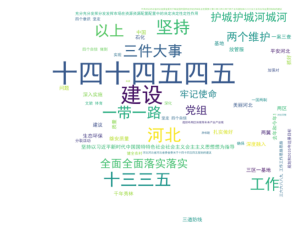

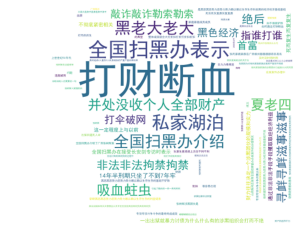

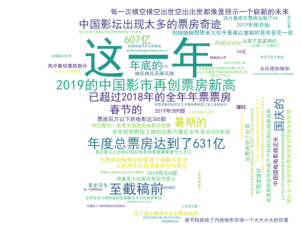

In [16]:
import jieba
from wordcloud import WordCloud,STOPWORDS
from imageio import imread # 处理图像的函数
import matplotlib.pyplot as plt

# 读取文本文件
def word_cloud(path):
    text = open(path, 'r',encoding='utf-8').read()
# 对文本进行分词
    cut_text = ''.join(jieba.lcut(text,True))
# 读取图片

    color_mask = imread('ML_work/jieba.jpg')
# 生成词云
    cloud = WordCloud(font_path='simhei.ttf',# 这里是导入字体，中文的需要自己选择合适的字体包
                  background_color="white",
                  mask=color_mask,
                  max_words=2000,
                  max_font_size=80)
    word_cloud = cloud.generate_from_text(cut_text)

# 输出图片
    plt.axis('off')
    plt.imshow(word_cloud)
    plt.show()
word_cloud('./economic.txt')
word_cloud('./society.txt')
word_cloud('./entertain.txt')